In [1]:
%run ../convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Problem 1

Exercise: Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.

In [2]:
from functools import partial
from keras.layers import Dense, Flatten
from keras.layers import ELU
from keras.models import Sequential

model = Sequential([
    Flatten(),
    Dense(100, kernel_initializer = 'he_normal'),
    ELU(alpha = 1),
    Dense(100, kernel_initializer = 'he_normal'),
    ELU(alpha = 1),
    Dense(100, kernel_initializer = 'he_normal'),
    ELU(alpha = 1),
    Dense(100, kernel_initializer = 'he_normal'),
    ELU(alpha = 1),
    Dense(100, kernel_initializer = 'he_normal'),
    ELU(alpha = 1)
])

Using TensorFlow backend.


# Problem 2

Exercise: Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons, and as always make sure to save checkpoints at regular intervals and save the final model so you can reuse it later.

In [3]:
from keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = load_data()
mask = y_train < 5
X_train = X_train[mask] / 250.
y_train = y_train[mask]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 6)

In [4]:
model.add(Dense(5, activation = 'softmax'))

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
checkpoint_cb = ModelCheckpoint('mnist_0_4.h5', save_best_only=True)
early_cb = EarlyStopping(patience=8, restore_best_weights=True)
model.compile(optimizer=Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [6]:
hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 30, batch_size = 32, callbacks=[checkpoint_cb, early_cb])

Train on 22947 samples, validate on 7649 samples
Epoch 1/30
22947/22947 [==============================] - 3s 132us/step - loss: 0.1177 - accuracy: 0.9624 - val_loss: 0.1163 - val_accuracy: 0.9657
Epoch 2/30
22947/22947 [==============================] - 2s 85us/step - loss: 0.0587 - accuracy: 0.9811 - val_loss: 0.0759 - val_accuracy: 0.9784
Epoch 3/30
22947/22947 [==============================] - 2s 74us/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0596 - val_accuracy: 0.9831
Epoch 4/30
22947/22947 [==============================] - 2s 72us/step - loss: 0.0294 - accuracy: 0.9898 - val_loss: 0.0877 - val_accuracy: 0.9763
Epoch 5/30
22947/22947 [==============================] - 2s 72us/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0750 - val_accuracy: 0.9826
Epoch 6/30
22947/22947 [==============================] - 2s 72us/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0701 - val_accuracy: 0.9833
Epoch 7/30
22947/22947 [==============================] - 2s 78us/st

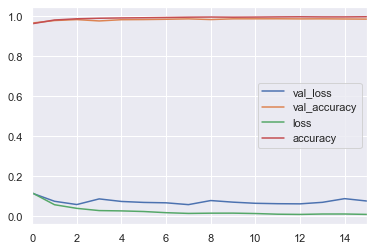

In [7]:
pd.DataFrame(hist.history).plot()

# Problem 3

Exercise: Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?

In [8]:
from keras.layers import BatchNormalization
DefaultLayer = partial(Dense, units = 100, activation = 'elu', kernel_initializer = 'he_normal')
model_batch = Sequential([
    Flatten(),
    BatchNormalization(),
    DefaultLayer(),
    BatchNormalization(),
    DefaultLayer(),
    BatchNormalization(),
    DefaultLayer(),
    BatchNormalization(),
    DefaultLayer(),
    BatchNormalization(),
    DefaultLayer(),
    BatchNormalization(),
    Dense(5, activation = 'softmax')
])

In [9]:
model_batch.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])

In [10]:
batch_checkpoint_cb = ModelCheckpoint('mnist_0_4_batch.h5', save_best_only=True)
batch_early_cb = EarlyStopping(patience=10, restore_best_weights=True)
batch_hist = model_batch.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 30, batch_size = 32, callbacks = [batch_checkpoint_cb, batch_early_cb])

Train on 22947 samples, validate on 7649 samples
Epoch 1/30
22947/22947 [==============================] - 8s 338us/step - loss: 0.1375 - accuracy: 0.9558 - val_loss: 0.0750 - val_accuracy: 0.9782
Epoch 2/30
22947/22947 [==============================] - 3s 117us/step - loss: 0.0710 - accuracy: 0.9788 - val_loss: 0.0713 - val_accuracy: 0.9790
Epoch 3/30
22947/22947 [==============================] - 3s 121us/step - loss: 0.0590 - accuracy: 0.9811 - val_loss: 0.0616 - val_accuracy: 0.9829
Epoch 4/30
22947/22947 [==============================] - 3s 125us/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0572 - val_accuracy: 0.9846
Epoch 5/30
22947/22947 [==============================] - 4s 153us/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 6/30
22947/22947 [==============================] - 4s 174us/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0621 - val_accuracy: 0.9833
Epoch 7/30
22947/22947 [==============================] - 3s 13

Text(0.5, 1.0, 'Batch normalization Learning Curve')

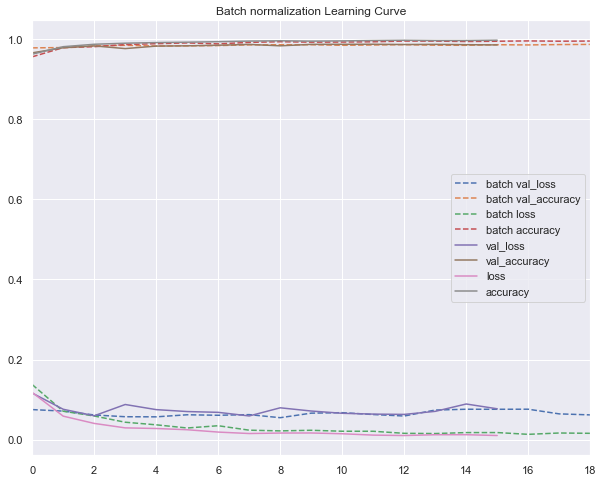

In [11]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()
pd.DataFrame(batch_hist.history).rename(columns = lambda x: 'batch ' + x).plot(ax =ax, linestyle = '--')
pd.DataFrame(hist.history).plot(ax = ax)
ax.set_title('Batch normalization Learning Curve')

# Problem 4

Exercise: is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?

In [12]:
from keras.layers import Dropout
drop_batch_model = Sequential([
    Flatten(),
    BatchNormalization(),
    DefaultLayer(),
    BatchNormalization(),
    Dropout(.5),
    DefaultLayer(),
    BatchNormalization(),
    Dropout(.5),
    DefaultLayer(),
    BatchNormalization(),
    Dropout(.5),
    DefaultLayer(),
    BatchNormalization(),
    Dropout(.5),
    DefaultLayer(),
    BatchNormalization(),
    Dropout(.5),
    Dense(5, activation='softmax')
])
drop_batch_checkpoint_cb = ModelCheckpoint('mnist_0_4_drop_batch.h5', save_best_only=True)
drop_batch_early_cb = EarlyStopping(patience=10, restore_best_weights=True)

drop_batch_model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])

In [13]:
drop_batch_hist = drop_batch_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 30, batch_size = 32, callbacks = [drop_batch_checkpoint_cb, drop_batch_early_cb])

Train on 22947 samples, validate on 7649 samples
Epoch 1/30
22947/22947 [==============================] - 18s 789us/step - loss: 0.6751 - accuracy: 0.7794 - val_loss: 0.1304 - val_accuracy: 0.9621
Epoch 2/30
22947/22947 [==============================] - 3s 132us/step - loss: 0.2799 - accuracy: 0.9188 - val_loss: 0.1137 - val_accuracy: 0.9674
Epoch 3/30
22947/22947 [==============================] - 3s 137us/step - loss: 0.2271 - accuracy: 0.9355 - val_loss: 0.1050 - val_accuracy: 0.9703
Epoch 4/30
22947/22947 [==============================] - 3s 136us/step - loss: 0.1988 - accuracy: 0.9449 - val_loss: 0.0874 - val_accuracy: 0.9762
Epoch 5/30
22947/22947 [==============================] - 3s 137us/step - loss: 0.1823 - accuracy: 0.9490 - val_loss: 0.0916 - val_accuracy: 0.9761
Epoch 6/30
22947/22947 [==============================] - 3s 142us/step - loss: 0.1714 - accuracy: 0.9516 - val_loss: 0.0788 - val_accuracy: 0.9784
Epoch 7/30
22947/22947 [==============================] - 3s 1

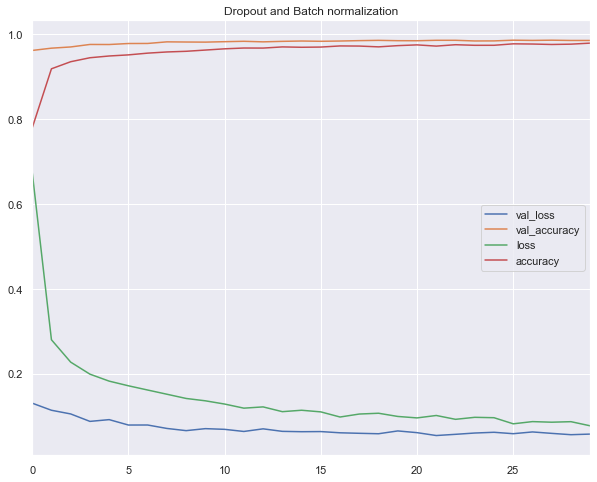

In [14]:
pd.DataFrame(drop_batch_hist.history).plot(figsize = (10,8), title = 'Dropout and Batch normalization')

# Transfer learning

Exercise: create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a new one.
<hr> 
    Exercise: train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?

<h3 class = 'box highlight'>You must always compile your model after you freeze or unfreeze
layers.</h3>

<img src = '../transfer_keras.png'>

In [ ]:
from keras.models import clone_model, load_model
pretrained_model = load_model('mnist_0_4_drop_batch.h5h5')